<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_3_6_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_3.6'

In [4]:
os.listdir(base_path)

['data_add_delta_3.6_n20.csv',
 'data_add_delta_3.6_n30.csv',
 'data_add_delta_3.6_n60.csv',
 'data_add_delta_3.6_n120.csv',
 'data_add_delta_3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.6_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,56.430038,74.617667,98.438727,1.024521e+07,1.024545e+07,3.762139e+05,9.869239e+06
1,0.0,1.0,41.321385,70.807138,64.285975,-7.904446e+06,-7.904260e+06,-1.270145e+05,-7.777245e+06
2,0.0,2.0,97.569298,71.702146,80.680950,3.948925e+06,3.949185e+06,1.178275e+06,2.770910e+06
3,0.0,3.0,95.847263,60.930988,21.264605,3.054973e+06,3.055161e+06,8.081348e+05,2.247027e+06
4,0.0,4.0,36.355496,24.921419,84.847584,-6.453098e+04,-6.437486e+04,-4.977953e+05,4.334205e+05
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,96.120114,89.727149,28.194171,-7.514632e+06,-7.514408e+06,-2.055590e+05,-7.308849e+06
249996,999.0,246.0,35.459513,28.969407,64.695515,9.240752e+04,9.254665e+04,-3.255339e+05,4.180805e+05
249997,999.0,247.0,60.281445,89.820202,64.100453,-1.378061e+06,-1.377837e+06,-4.668549e+05,-9.109822e+05
249998,999.0,248.0,29.142842,36.286090,55.851661,-6.198099e+05,-6.196786e+05,-5.011651e+05,-1.185135e+05


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,56.430038,74.617667,98.438727,1.024521e+07,1.024545e+07,3.762139e+05,9.869239e+06
1,0.0,1.0,41.321385,70.807138,64.285975,-7.904446e+06,-7.904260e+06,-1.270145e+05,-7.777245e+06
2,0.0,2.0,97.569298,71.702146,80.680950,3.948925e+06,3.949185e+06,1.178275e+06,2.770910e+06
3,0.0,3.0,95.847263,60.930988,21.264605,3.054973e+06,3.055161e+06,8.081348e+05,2.247027e+06
4,0.0,4.0,36.355496,24.921419,84.847584,-6.453098e+04,-6.437486e+04,-4.977953e+05,4.334205e+05
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,96.120114,89.727149,28.194171,-7.514632e+06,-7.514408e+06,-2.055590e+05,-7.308849e+06
249996,999.0,246.0,35.459513,28.969407,64.695515,9.240752e+04,9.254665e+04,-3.255339e+05,4.180805e+05
249997,999.0,247.0,60.281445,89.820202,64.100453,-1.378061e+06,-1.377837e+06,-4.668549e+05,-9.109822e+05
249998,999.0,248.0,29.142842,36.286090,55.851661,-6.198099e+05,-6.196786e+05,-5.011651e+05,-1.185135e+05


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    56.430038  74.617667  ...  3.762139e+05  9.869239e+06
      1.0    41.321385  70.807138  ... -1.270145e+05 -7.777245e+06
      2.0    97.569298  71.702146  ...  1.178275e+06  2.770910e+06
      3.0    95.847263  60.930988  ...  8.081348e+05  2.247027e+06
      4.0    36.355496  24.921419  ... -4.977953e+05  4.334205e+05
...                ...        ...  ...           ...           ...
999.0 245.0  96.120114  89.727149  ... -2.055590e+05 -7.308849e+06
      246.0  35.459513  28.969407  ... -3.255339e+05  4.180805e+05
      247.0  60.281445  89.820202  ... -4.668549e+05 -9.109822e+05
      248.0  29.142842  36.286090  ... -5.011651e+05 -1.185135e+05
      249.0  30.233196  79.460010  ... -9.492315e+05 -1.737742e+07

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    56.430038  74.617667  ...  3.762139e+05  9.869239e+06
      1.0    41.321385  70.807138  ... -1.270145e+05 -7.777245e+06
      2.0    97.569298  71.702146  ...  1.178275e+06  2.770910e+06
      3.0    95.847263  60.930988  ...  8.081348e+05  2.247027e+06
      4.0    36.355496  24.921419  ... -4.977953e+05  4.334205e+05
...                ...        ...  ...           ...           ...
999.0 245.0  96.120114  89.727149  ... -2.055590e+05 -7.308849e+06
      246.0  35.459513  28.969407  ... -3.255339e+05  4.180805e+05
      247.0  60.281445  89.820202  ... -4.668549e+05 -9.109822e+05
      248.0  29.142842  36.286090  ... -5.011651e+05 -1.185135e+05
      249.0  30.233196  79.460010  ... -9.492315e+05 -1.737742e+07

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,56.430038,74.617667,98.438727,1.024521e+07,1.024545e+07,3.762139e+05,9.869239e+06
1,0.0,1.0,41.321385,70.807138,64.285975,-7.904446e+06,-7.904260e+06,-1.270145e+05,-7.777245e+06
2,0.0,2.0,97.569298,71.702146,80.680950,3.948925e+06,3.949185e+06,1.178275e+06,2.770910e+06
3,0.0,3.0,95.847263,60.930988,21.264605,3.054973e+06,3.055161e+06,8.081348e+05,2.247027e+06
4,0.0,4.0,36.355496,24.921419,84.847584,-6.453098e+04,-6.437486e+04,-4.977953e+05,4.334205e+05
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,96.120114,89.727149,28.194171,-7.514632e+06,-7.514408e+06,-2.055590e+05,-7.308849e+06
249996,999.0,246.0,35.459513,28.969407,64.695515,9.240752e+04,9.254665e+04,-3.255339e+05,4.180805e+05
249997,999.0,247.0,60.281445,89.820202,64.100453,-1.378061e+06,-1.377837e+06,-4.668549e+05,-9.109822e+05
249998,999.0,248.0,29.142842,36.286090,55.851661,-6.198099e+05,-6.196786e+05,-5.011651e+05,-1.185135e+05


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    56.430038  74.617667  ...  3.762139e+05  9.869239e+06
      1.0    41.321385  70.807138  ... -1.270145e+05 -7.777245e+06
      2.0    97.569298  71.702146  ...  1.178275e+06  2.770910e+06
      3.0    95.847263  60.930988  ...  8.081348e+05  2.247027e+06
      4.0    36.355496  24.921419  ... -4.977953e+05  4.334205e+05
...                ...        ...  ...           ...           ...
999.0 245.0  96.120114  89.727149  ... -2.055590e+05 -7.308849e+06
      246.0  35.459513  28.969407  ... -3.255339e+05  4.180805e+05
      247.0  60.281445  89.820202  ... -4.668549e+05 -9.109822e+05
      248.0  29.142842  36.286090  ... -5.011651e+05 -1.185135e+05
      249.0  30.233196  79.460010  ... -9.492315e+05 -1.737742e+07

[250000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

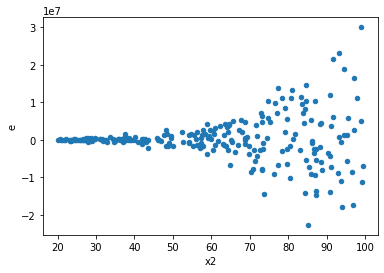

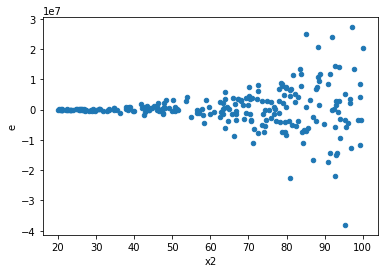

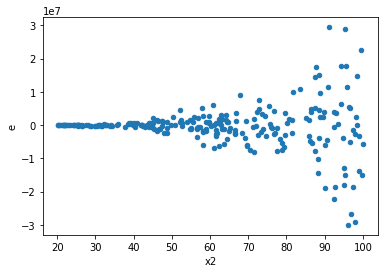

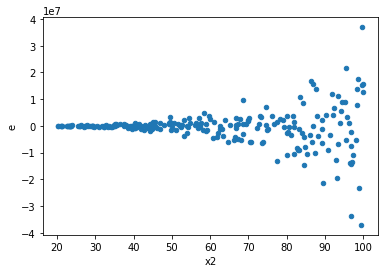

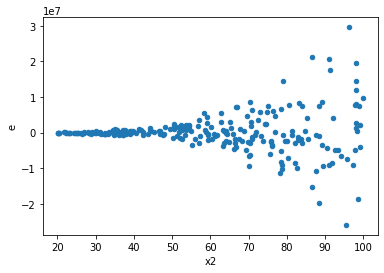

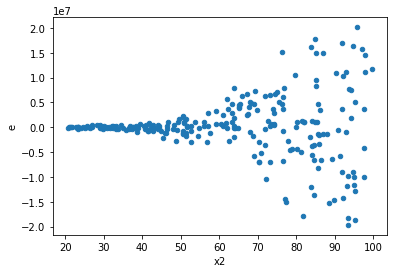

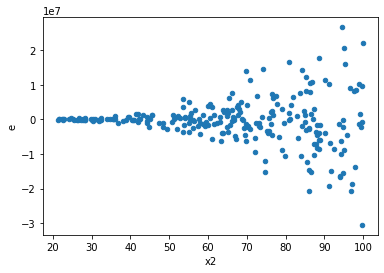

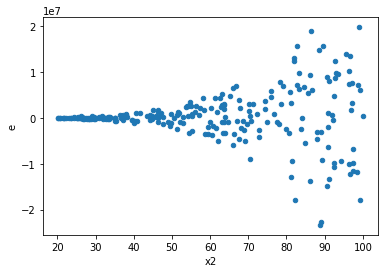

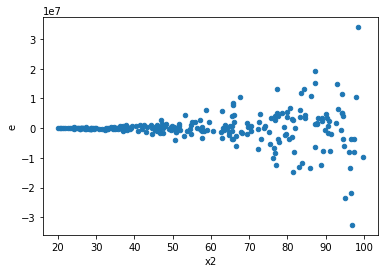

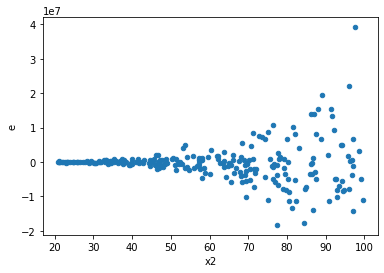

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,97.0,97.0,8525597015785024.0,38662707076996.42,88808302247760.67,402736532052.0461,220.51215914101354,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,9996064879335786.0,69787800829469.86,104125675826414.44,726956258640.311,143.23513222263148,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,1.0759694345087254e+16,70080464221896.93,112080149427992.23,730004835644.7596,153.53343423951438,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,1.1134245210763894e+16,30928620536550.297,115981720945457.23,322173130589.0656,359.99811881703084,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,7293405063573040.0,31547173166318.53,75972969412219.17,328616387149.15137,231.19044692599826,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,8234484076016922.0,48686738737791.234,85775875791842.94,507153528518.6587,169.13197083018454,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,1.0151840805632472e+16,246930789100377.78,105748341725338.25,2572195719795.602,41.11208992049077,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,7700161400095325.0,26767026743120.69,80210014584326.3,278823195240.8405,287.67339286476107,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,7335382550277530.0,37278830850543.53,76410234898724.27,388321154693.1618,196.770724374007,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,8525597015785024.0,38662707076996.42,88808302247760.67,402736532052.0461,220.51215914101354,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,9996064879335786.0,69787800829469.86,104125675826414.44,726956258640.311,143.23513222263148,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,1.0759694345087254e+16,70080464221896.93,112080149427992.23,730004835644.7596,153.53343423951438,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,1.1134245210763894e+16,30928620536550.297,115981720945457.23,322173130589.0656,359.99811881703084,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,7293405063573040.0,31547173166318.53,75972969412219.17,328616387149.15137,231.19044692599826,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,8234484076016922.0,48686738737791.234,85775875791842.94,507153528518.6587,169.13197083018454,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,1.0151840805632472e+16,246930789100377.78,105748341725338.25,2572195719795.602,41.11208992049077,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,7700161400095325.0,26767026743120.69,80210014584326.3,278823195240.8405,287.67339286476107,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,7335382550277530.0,37278830850543.53,76410234898724.27,388321154693.1618,196.770724374007,2.220446049250313e-16,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64